# <font color="blue">DA503 - Homework Assignment 3</font>

Assigned: December 19th, 2020<br>
Due: **December 28th, 2020 23:59pm**

Please use this notebook for your answers. Add your charts/graphs/code where necessary. You can select the "Markdown" mode from the drop-down menu above and type your answer/reasoning there. It would be extra nice if you can use equations. The notebooks we provided have numerous examples. you can also check the following link for the Markdown formula: http://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/

### Requirements (very important):
1. Please use **this notebook** to answer the questions. If you work on Colab, you can download your notebook and use it for submission.


2. Please name your notebook as **`lastName_firstName_HW3.ipynb`** and upload it to SuCourse+ on time.


3. Don't send your work in HTML format. Because we must be able to run your code if need be. Don't send it in the **`.py`** format either. They won't be processed.  


4. Please work alone.

# Q1.
The data file **`MeanSeaLevel.csv`** contains the sea levels recorded daily at Limetree Bay in the United States between the years 2000 and 2019 for the last 20 years. The measurements are taken from https://uhslc.soest.hawaii.edu/data/?rq. 

Suppose you've been contacted to assess whether there is statistical evidence for the sea-level increase in the area. You're supposed to make a comparison between the first decade (2000-2009) and the second decade (2010-2019).

1. Create a single panel plot for the histograms of the sea level for both decades and comment on the difference between the two by simply eyeballing your plots.


2. Compute a **95% confidence interval** for both decades. Based on the results from the confidence intervals, do you think there is sufficient evidence in the data to conclude that there is a significant difference in the mean sea levels between the two decades. Justify your answer.  

C:\Users\Solvia\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Solvia\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


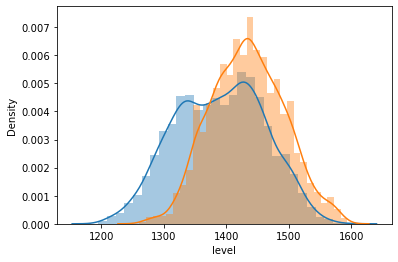

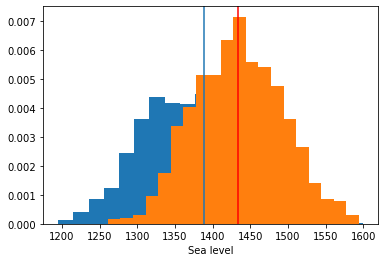

In [148]:
import seaborn as sns

sea_lv = pd.read_csv(r'C:\Users\Solvia\Downloads\meansealevel.csv')
pop1 = sea_lv[(sea_lv['year']>=2000) & (sea_lv['year']<=2009 )].level
pop2 = sea_lv[(sea_lv['year']>=2010) & (sea_lv['year']<=2019 )].level
mean1=np.mean(pop1)
mean2=np.mean(pop2)
sns.distplot(pop1)
sns.distplot(pop2)
plt.show()
plt.hist(pop1,bins=20,density=True)
plt.axvline(x=mean1)
plt.hist(pop2,bins=20,density=True)
plt.axvline(x=mean2,color='red')
plt.xlabel('Sea level')
plt.show()

#As we can observe from the below graphics, in one decade, level of the sea has been increased.That might be a alarm of global 
#warming in nature. It is hard to decide if it is a statiscally significant increase, but it is a substantial increase for a decade.
#lets we look in statistical perspective.

In [248]:
std1=np.std(pop1)
std2=np.std(pop2)
se1=std1/np.sqrt(len(pop1))
se2=std1/np.sqrt(len(pop2))
CIup1=stats.norm.ppf(0.975,mean1,se1)
CIlow1=stats.norm.ppf(0.025,mean1,se1)
print('pop1: 2000-2009 twosided CI:',CIlow1,CIup1)
CIup2=stats.norm.ppf(0.975,mean2,se2)
CIlow2=stats.norm.ppf(0.025,mean2,se2)
print('pop1: 2010-2019 twosided CI:',CIlow2,CIup2)

tvalue , pvalue = stats.ttest_ind(pop1,pop2,equal_var = False)
print(tvalue,pvalue)
print('mean1:',mean1,'mean2:',mean2)

pop1: 2000-2009 twosided CI: 1386.8332902386464 1391.4795898055768
pop1: 2010-2019 twosided CI: 1431.6224045417948 1436.3660714017374
-28.995044474747765 1.4773803372747523e-174
mean1: 1389.1564400221116 mean2: 1433.994237971766


Above you can see, both distributions's %95 Confidence Intervals are not overlapping and there are important difference between Intervals, I interpret that there are significance difference between samples..

In [420]:
#stats.norm.interval(0.975,mean2,se2)
#stats.t.interval(0.975,len(pop1)-1,mean1,se1)

(1431.2818238859481, 1436.706652057584)

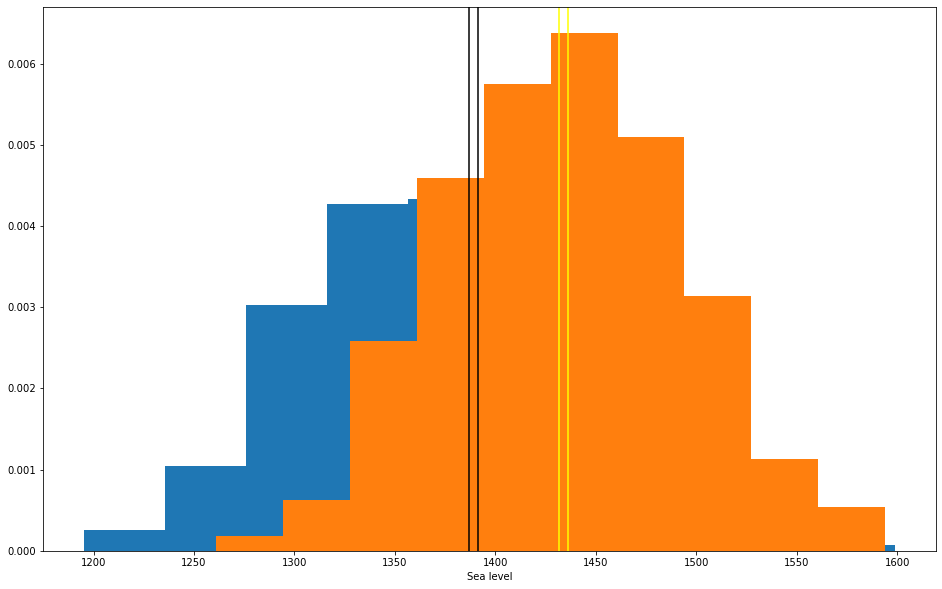

In [244]:

plt.figure(figsize=(16,10))
plt.hist(pop1,density=True)
plt.axvline(x=CIup1,color='black')
plt.axvline(x=CIlow1,color='black')
plt.hist(pop2,density=True)
plt.axvline(x=CIlow2,color='yellow')
plt.axvline(x=CIup2,color='yellow')
plt.xlabel('Sea level')
plt.show()

# Q2.
**`BostonHousing.csv`** contains data collected in the city of Boston USA. We have the house prices along with several other features that are used for predicting the sale prices. There are 506 instances, 13 features and one target (**MEDV**) in the data.

**Attribute information**:<br>
<pre>
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10,000
PTRATIO  pupil-teacher ratio by town
B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT    lower status of the population in percentage
MEDV     median value of owner-occupied homes in USD1000's
</pre>

We have, however, some missing entries for one of the attributes.

We have 61 missing data points (labeled as NaN) for the column of **NOX**. Most of the Machine Learning models cannot handle missing data and won't work without a fix. We could either remove those rows where we have the missing data or simply replace them by some other value (a constant, mean value of NOX, etc.).

If we decide to remove the rows containing he missing values, we need to make sure that the data is missing completely at random. In other words, the missingness shouldn't be depending on the values of other features. When the missingness is due to other features' having a special range of values for example, then we cannot say that data is missing completely at random, and we introduce a strong bias to the data by removing those missing entries.

Do you think we can delete the rows with missing values without introducing a bias into the data?

**Hint**: Even though it won't provide a 100\% guarantee, one way of checking randomness is to conduct a 2-sample t-test. For each feature, you can identify the portion of that feature that matches the rows where we have the missing data for NOX. Then you have the rest of the data for the same feature. Having 2 samples now, you can run a 2-sample t-test to see if the means of these two samples are significantly different. If they are not, you can conclude that missingness in **NOX** is not related to the values of the feature under examination.

In [188]:
import pandas as pd
import scipy.stats as stats
df = pd.read_csv(r'C:\Users\Solvia\Downloads\BostonHousing.csv')

In [189]:
import numpy as np
import matplotlib.pyplot as plt
print('rm mean:',np.mean(rm),'rm std:',np.std(rm))
print('nox mean:',np.mean(nox),'nox std:',np.std(nox))


rm mean: 6.284634387351788 rm std: 0.7019225143345689
nox mean: 0.5584377528089906 nox std: 0.1166210381096893


In [419]:
#My hypotesis:
#H0: Null values and not null values means are equal,
#H1: Null values and not null values means are not equal
#I will accept my significance level for this problem as 0.05...
significants={}
for idx in df.columns : 
    x1=df_notnull[idx]
    x2=df_null[idx]
    tvalue, pvalue=stats.ttest_ind(x1 ,x2,equal_var=False)
    if pvalue < 0.05:
        significants[idx]=pvalue
    print('T-value of', idx ,  tvalue,  'P-value of',idx ,pvalue )
significants

#from significants dictionary, we can see INDUS,DIS,B,LSTAT columns' p values are less than 0.05. That means, INDUS , DIS , B and LSTAT columns mean values, are differentiating
#between NOX's NAN and Not NAN cases. Here we can say, These four columns might be directly effected from NaN values cases in NOX column.



T-value of CRIM 1.872326496687909 P-value of CRIM 0.06346446947074517
T-value of ZN -1.5002202707816124 P-value of ZN 0.137945319817576
T-value of INDUS 2.8016896121681096 P-value of INDUS 0.00630790431083557
T-value of CHAS -0.38949719938429334 P-value of CHAS 0.6980242763173032
T-value of NOX nan P-value of NOX nan
T-value of RM -0.9902168434934332 P-value of RM 0.3250365671590665
T-value of AGE 0.8365337180641471 P-value of AGE 0.40541991420518986
T-value of DIS -2.339371329151943 P-value of DIS 0.02213217234672333
T-value of RAD 0.2614657619965719 P-value of RAD 0.7944234157175604
T-value of TAX 0.961329179819879 P-value of TAX 0.3393695689599089
T-value of PTRATIO 0.4955424846569016 P-value of PTRATIO 0.6215896295973762
T-value of B -2.8834085290180624 P-value of B 0.004640304277585525
T-value of LSTAT 2.342236384805392 P-value of LSTAT 0.021495179844111874
T-value of NOX_cat -inf P-value of NOX_cat 0.0


{'INDUS': 0.00630790431083557,
 'DIS': 0.02213217234672333,
 'B': 0.004640304277585525,
 'LSTAT': 0.021495179844111874,
 'NOX_cat': 0.0}

# Q3.
The data file **`FlightStatus.csv`** contains scheduled and actual departure and arrival times, reason of delay. reported by certified U.S. air carriers that account for at least one percent of domestic scheduled passenger revenues. The data is collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS).

Here are the features given in the data file:

|Feature|Explanation|
|---|----|
|Carrier|Carrieer|
|DEP_TIME| Departure Time|
|DEST|Destination Airport code|
|DISTANCE|Distance to destination|
|ORIGIN|Origin Airport code|
|Weather|Code of 1 represents severe weather conditions|
|DAY_WEEK|Day of the Week|
|DAY_OF_MONTH|Day of the Month|
|Flight Status|is it **ontime** or **delayed**|


**Note that**<br>
>CO: Continental<br>
>DH: Atlantic Coast<br>
>DL: Delta<br>
>MQ: American Eagle<br>
>RU: Continental Express<br>
>US: US Airways<br>

Everything except the **Flight Status** is a **feature** (predictor) here. **Flight Status** is our **target** that we're trying to predict.

Our task is to do some feature elimination for this problem. Using a Chi-square independence test, we're supposed to find the features that have an association with the target and keep them for the Machine Learning model we'll build. We would like to eliminate all the features that have no association (dependency) with the target variable **Flight Status**.

**Hint 1**: Chi square test requires that you build a contingency table first. Do this for every feature vs the target value and keep those features that are significant. Pandas is your friend in building your contingency table. The rest is a simple execution of the Chi-square test for each table you constructed. 

**Hint 2**: Chi square independence test requires categorical variables. You can use the **`pd.cut`** command in Pandas to create categorical bins for numerical output. For the **DEP_TIME**, you can partition the whole day into 4:
* morning : 0600 - 1200 
* afternoon : 1200 - 1800
* evening : 1800 - 2400
* night : 2400 - 0600

In [396]:
df_flight=pd.read_csv(r'C:\Users\Solvia\Downloads\FlightStatus.csv')

#fl_stat  = df_flight['Flight Status']
#fl_stat = np.where(fl_stat == 'ontime', 1, fl_stat)
#fl_stat = np.where(fl_stat == 'delayed' , 0, fl_stat)
#fl_stat=fl_stat.tolist()
#dep_time = df_flight.DEP_TIME
#dep_time=pd.cut(dep_time,4,labels=[1,2,3,4])
#dep_time_table=[fl_stat.tolist(),dep_time.tolist()]
#chi2,p,ddof,expected= stats.chi2_contingency(dep_time_table)
#print('chi2:',chi2,'p:',p,'ddof:',ddof)

H0: Column x is not affecting Flight Status
H1: Colımn x is affecting Flight Status (x is the column names here, that is variable)
Here from below chi^2 tests, we can see only DISTANCE column is not effecting the 'Flight Status'. All others are effecting..

In [411]:
#DEP_TIME effect to flight status
dep_time = pd.cut(df_flight.DEP_TIME,4,labels=[1,2,3,4])
cont_table=pd.crosstab(index=dep_time, columns=df_flight["Flight Status"])
chi2,p,ddof,expected= stats.chi2_contingency(cont_table)
print('chi2:',chi2,'p:',p,'ddof:',ddof)
#p is less then 0.05, it is very significant number, it is obviously effecting the flight status...
cont_table

chi2: 20.795832287423465 p: 0.00011607046653862219 ddof: 3


Flight Status,delayed,ontime
DEP_TIME,,
1,71,108
2,60,91
3,192,149
4,96,80


In [398]:
#CARRIER effect to flight status

cont_table=pd.crosstab(index=df_flight.CARRIER, columns=df_flight["Flight Status"])
chi2,p,ddof,expected= stats.chi2_contingency(cont_table)
print('chi2:',chi2,'p:',p,'ddof:',ddof)
#p is less then 0.05, it is very significant number, it is obviously effecting the flight status...
cont_table

chi2: 33.27575451081729 p: 3.3174862952483386e-06 ddof: 5


Flight Status,delayed,ontime
CARRIER,,
CO,26,23
DH,137,113
DL,47,70
MQ,80,59
RU,94,77
US,35,86


In [399]:
#DEST effect to flight status

cont_table=pd.crosstab(index=df_flight.DEST, columns=df_flight["Flight Status"])
chi2,p,ddof,expected= stats.chi2_contingency(cont_table)
print('chi2:',chi2,'p:',p,'ddof:',ddof)
#p is less then 0.05, it is very significant number, it is obviously effecting the flight status...
cont_table

chi2: 6.841168433305306 p: 0.032693329371218466 ddof: 2


Flight Status,delayed,ontime
DEST,,
EWR,161,132
JFK,80,78
LGA,178,218


In [400]:
#DISTANCE effect to flight status
cont_table=pd.crosstab(index=df_flight.DISTANCE, columns=df_flight["Flight Status"])
chi2,p,ddof,expected= stats.chi2_contingency(cont_table)
print('chi2:',chi2,'p:',p,'ddof:',ddof)
#p is much more then 0.05, there is no effect by DISTANCE toward flight status...
cont_table

chi2: 1.7964934877705012 p: 0.4072831057266243 ddof: 2


Flight Status,delayed,ontime
DISTANCE,,
long,332,345
mid,54,59
short,33,24


In [401]:
#ORIGIN effect to flight status
cont_table=pd.crosstab(index=df_flight.ORIGIN, columns=df_flight["Flight Status"])
chi2,p,ddof,expected= stats.chi2_contingency(cont_table)
print('chi2:',chi2,'p:',p,'ddof:',ddof)
#p is less then 0.05, it is very significant number, it is obviously effecting the flight status...
cont_table

chi2: 15.167256494310664 p: 0.0005087121372080298 ddof: 2


Flight Status,delayed,ontime
ORIGIN,,
BWI,33,24
DCA,221,282
IAD,165,122


In [402]:
#Weather effect to flight status
cont_table=pd.crosstab(index=df_flight.Weather, columns=df_flight["Flight Status"])
chi2,p,ddof,expected= stats.chi2_contingency(cont_table)
print('chi2:',chi2,'p:',p,'ddof:',ddof)
#p is less then 0.05, it is very significant number, it is obviously effecting the flight status...
cont_table

chi2: 29.708497829455638 p: 5.021421681116425e-08 ddof: 1


Flight Status,delayed,ontime
Weather,,
0,389,428
1,30,0


In [403]:
#DAY_WEEK effect to flight status
cont_table=pd.crosstab(index=df_flight.DAY_WEEK, columns=df_flight["Flight Status"])
chi2,p,ddof,expected= stats.chi2_contingency(cont_table)
print('chi2:',chi2,'p:',p,'ddof:',ddof)
#p is less then 0.05, it is very significant number, it is obviously effecting the flight status...
cont_table

chi2: 33.10557038185318 p: 1.0006590265841187e-05 ddof: 6


Flight Status,delayed,ontime
DAY_WEEK,,
1,82,54
2,62,67
3,57,62
4,55,69
5,72,68
6,24,66
7,67,42


In [404]:
#DAY_OF_MONTH effect to flight status
cont_table=pd.crosstab(index=df_flight.DAY_OF_MONTH, columns=df_flight["Flight Status"])
chi2,p,ddof,expected= stats.chi2_contingency(cont_table)
print('chi2:',chi2,'p:',p,'ddof:',ddof)
#p is less then 0.05, it is very significant number, it is obviously effecting the flight status...
cont_table

chi2: 126.53435832547848 p: 8.049074869076759e-14 ddof: 30


Flight Status,delayed,ontime
DAY_OF_MONTH,,
1,0,8
2,6,8
3,5,13
4,20,15
5,28,12
6,9,29
7,17,16
8,9,20
9,12,14
